In [13]:
# Basic imports that are required for the smooth use of Python
import numpy as np                # Absolutely necessary
from scipy import signal          # For signal processing tools
from scipy import fftpack as fft  # Fourier transform and spectral analysis
import math as math               # Not always required. But can simplify the matrix/linear algebraical calculations 
import matplotlib.pyplot as plt

import IPython.display as ipd     # used to construct display elements. ipd.display == display (which is imported by default in Jupyter Lab)

#import itertools                  # used to iterate over all combinations of parameters for a certain plot
# alternative: plotly - also for jupyterLab

## WAV files
from scipy.io import wavfile
import warnings                   # used to ignore some warnings in WAV-file reading
warnings.simplefilter(action='ignore', category=wavfile.WavFileWarning)

## Loading Matlab files
from scipy.io import loadmat  # To load a matlab data file.

## Breakpoints (if needed) for debugging
import pdb     # Setting breakpoints for debugging

## HTML/CSS styling
from IPython.display import HTML
def css_styling():
    return HTML(open("../assets/styles/custom.css",'r').read())


## Plot parameters
#plt.ioff()                        # interactive mode off -- this means you need plt.show() to show the plots
#plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams.update({'font.size': 22})

$
\newcommand{\unit}[1]{\ensuremath{\text{#1}}}
\newcommand{\tmidx}{m}
\newcommand{\matcmd}[2][(\cdot)]{\texttt{#2}#1}
\renewcommand{\matcmd}[2][(\cdot)]{\mathrm{#2}#1}
\newcommand{\fcn}[1]{{\text{#1}}}
\newcommand{\bigcb}[1]{{\big\{#1\big\}}} 
\newcommand{\Bigcb}[1]{{\Big\{#1\Big\}}}
\newcommand{\bigsb}[1]{{\big[#1\big]}} 
\newcommand{\Bigsb}[1]{{\Big[#1\Big]}}
\newcommand{\biggsb}[1]{{\bigg[#1\bigg]}}
\newcommand{\parvec}{\boldsymbol{\theta}}
\newcommand{\featvec}[1][m]{\mathbf{x}^{(#1)}}
\newcommand{\featmat}{\mathbf{X}}
\newcommand{\featlbl}[1][m]{y^{(#1)}}
\newcommand{\estfeatlbl}[1][m]{\widehat{y}^{(#1)}}
\newcommand{\lblvec}{\mathbf{y}}
\newcommand{\estlblvec}{\widehat{\mathbf{y}}}
$

# Logistic regression
In this exercise, we will get hands-on experience with _supervised classification_ of data. We will look at the simple _binary classification_ problem, where the data must be categorised as belonging to 'Class 0' or 'Class 1'. In this exercise, you will not only learn to implement the approaches but also learn the standard good-practices that are applied in data-analysis.

We will first define help functions that allow us to predict the outcome given the model parameters ($\parvec$), calculate the log-likelihood and the accuracy of the designed classifier. 

Then, we will implement the logistic regression algorithm for estimating $\parvec$ and test it on a toy (synthetic)-dataset. Once we are satisfied by the performance on the toy-data, we will test the approach on a _real-world_ dataset in which we would like to be able to predict whether a patient has diabetes or not, given clinical information relating to the patient. 

## Definition of helper functions
In this section we shall define the basic functions we shall need to implement the logistic regression based classifier.

### Definition of the `sigmoid` function
<div class="alert alert-info">
    
Define the function `Sigmoid` that returns the sigmoid of the input `x` as:
$$\text{sigmoid}(x) = \dfrac{1}{1 + \exp{(-x)}}$$    
    
</div>    

In [171]:
# Definition of the sigmoid function. Enter your code here
def Sigmoid(x):
    Sigmoid = 1/(1+np.exp(-x))
#     print(f"h_theta:{Sigmoid.shape}")
    return Sigmoid

### Defining the log-likelihood function

As we have seen in the lecture, the parameters $\parvec$ are obtained by running several iterations on the training data. During this training, we could use the log-likelihood of the data in the training set to see if the training is proceeding in the correct direction (log-likelihood keeps increasing) and how close we are to convergence (to break the iterations when the algorithm/training is converged).

Consider that we have a training data set consisting of $M$ _augmented_ feature vectors $\featvec$ (i.e., feature vectors that have been extended with a 1 as the first element (see last lecture slide)). Let $N$ be the dimension of this augmented feature vector (i.e., $\featvec\in\mathbb{R}^{(N\times 1)}$). We can collect these vectors into an $(N\times M)$ matrix $\featmat = \Big(\featvec[0],\featvec[1],\ldots,\featvec[M-1] \Big)$. Similarly, we can collect the $M$ class labels $\featlbl$ into a $(M\times 1)$ _column_ vector as $\lblvec = \big(\featlbl[0], \featlbl[1],\ldots ,\featlbl[M-1]\big)^T$

At any iteration $k$, given the estimate of the classifier parameters ${\parvec}_{(k)}$, the 'goodness' of that parameter estimate is reflected in the log-likelihood value. Recollect that the log-likelihood was defined as:
$$\log\,\mathcal{L}\big(\mathbf{y}\rvert\mathbf{X};{\parvec}_{(k)}\big) = \sum_{m}\log\,\mathcal{L}\big(y^{(m)}\rvert\mathbf{x}^{(m)};{\parvec}_{(k)}\big)\,,$$

Further, recall that $\mathcal{L}(y\rvert\mathbf{x};\parvec) = h_{\parvec}^{y}(\mathbf{x})\big(1-h_{\parvec}(\mathbf{x})\big)^{(1-y)}$ 

<div class="alert alert-info">

Implement a function that returns the log-likelihood for a given set of feature vectors $\featmat$, the corresponding set of class labels $\lblvec$, and the logistic regression parameters $\parvec$. 
    
Use the template: `logLikelihood = LogLikelihood(X,y,theta)`
    
</div>    

In [183]:
# Define the log-likelihood function here.
def LogLikelihood(X,y,theta):
    theta0 = 0  
    if len(theta) - len(X[:,0]) == 1: # if theta is augmented
        theta0, theta = theta[0], theta[1:]
    a = y*np.log(Sigmoid(theta0 + theta.T @ X)) + (1-y)*np.log(1-Sigmoid(theta0 + theta.T @ X))
    logLikelihood = np.sum(y*np.log(Sigmoid(theta0 + theta.T @ X)) + (1-y)*np.log(1-Sigmoid(theta0 + theta.T @ X)))
#     print(f"a{a.shape}")
#     print(f"class labels y :{y}")
    return logLikelihood


theta0 = 0
if len(theta) - len(X[:,0]) == 1:
    theta0 = theta[0]
    theta = theta[1:]

# why this is necesarry?

### Predicting the label of a test-data point
Now, assuming we have an estimate the sigmoid paramter ${\parvec}$, we shall write a function to compute the label prediction $\widehat{y}$ for a given test data-point $\mathbf{x}$. This function can be used in several ways:
1. in determining the log-likelihood during the training phase
1. in computing the performance of the classifier on the test data 

<div class="alert alert-info">
    
To implement this function, take the following steps:
    
* Compute $h_{\parvec}(\mathbf{x})$. We know that $0\leq h_{\parvec}(\mathbf{x}) \leq 1$. 
* However, the logistic regression classifier should output a class _label_ $\widehat{y} \in\{0, 1\}$. 
* Thus, to map from the continuous value $h_{\parvec}(\mathbf{x})$ to a binary label, we need to quantise $h_{\parvec}(\mathbf{x})$. We do this by setting a threshold $\Gamma$ on $h_{\parvec}(\mathbf{x})$ such that:
$$ \widehat{y} = \begin{cases} 1 & h_{\parvec}(\mathbf{x}) \geq \Gamma \\
                               0 & \text{otherwise} \end{cases}$$
* This will classify the data point into `Class 1` or `Class 0`. We typically choose $\Gamma = 0.5$.   

Use the template: `yHat = PredictLabel(x,theta)` for this function. 
    
Note: if you are feeling efficient, you can modify this function so that it returns the label for a whole _set_ of input data points in the form of the data matrix $\mathbf{X}$.

**Tip:** Since we will be using the bias term in our definiton of the logistic function, take this into account when you input the feature vectors and the parameter vectors (i.e., if your input is the original ( _unaugmented_ ) feature, then remember to attach the row of `1` to the matrix (see last slide of lecture). 
    
</div>    

In [207]:
# Function to predict the label of data, given the features.
def PredictLabel(X,theta):
    theta0 = 0
    if len(theta) - len(X[:,0]) == 1:
        theta0 = theta[0]
        theta = theta[1:] 
    # Add your code here: first compute h_theta 
    h_theta = Sigmoid(theta0 + theta.T @ X)
    # Next, quantise the value to the two class labels here. 
    # gamma = 0.5 is the threshold for the quantisation.
    yHat = np.where(h_theta >= 0.5,1,0) 
    # If h_theta is greater than or equal to 0.5, the predicted class is 1
    # If the probability is less than 0.5, the predicted class is 0.
    return yHat

### Computing the accuracy of the classifier

The metrics that define the accuracy of a classifier are computed on the basis of a so-called _confusion matrix_. This is obtained by comparing the _predicted_ labels $\estfeatlbl$ to the _true_ label $\featlbl$. Of course, we can only compute the confusion matrix when the _true_ labels are available... which does not occur very often in practice. What is typically done is to compute this on the training data, to judge the accuracy of the trained classifier. This method is often adapted when comparing two different classifiers. 

Assume we have $M$ data-points[<sup>1</sup>](#fn1) for which the true labels $\featlbl$ are available and the predicted labels $\estfeatlbl$ have been computed. For the binary classifier we have seen in the lecture, the confusion matrix $\boldsymbol{\mathcal{C}}$ is typically written as a $(2\times 2)$ matrix where the elements $\mathcal{C}(i,j)$ indicate the _number_ of times $\estfeatlbl = i$ and $\featlbl=j$ where $i,j \in \bigcb{0,1}$

<span id="fn1"> <sup>1</sup> The terms data-points and feature vectors are used interchangeably </span>

<div class = "alert alert-info">
    
Write such a function `GetConfusionMatrix` to compute the confusion matrix for a given trained classifier. 
    
Use the template `confMatrix = GetConfusionMatrix(y,yHat)`, where `y` is the set of correct class labels and `yHat` is the set of predicted data labels. 
    
</div>
</span>

In [208]:
# Compute the confusion matrix of the classifier
# Just making a confusion Matrix based on the number of test-data
def GetConfusionMatrix(yTrue,yHat):
    confMatrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confMatrix[i,j] = np.sum(np.where(yHat == i, 1, 0)*np.where(yTrue == j, 1, 0))
    return confMatrix

In [209]:
# yTrue,yHat = [1,1,1,1,0,1,1,0,0,1,1],[1,1,1,0,1,0,1,0,1,0,1]
# confMatrix = np.zeros((2,2))
# for i in range(2):
#     for j in range(2):
#         confMatrix[i,j] = np.sum(np.where(yHat == i, 1, 0)*np.where(yTrue == j, 1, 0))

### Computing the accuracy of the classifier
Based on the confusion matrix, we shall now compute the accuracy of the classifier in terms of the true negatives (TN), true positives (TP), false negatives (FN) and false positives (FP). Typically, these are expressed as a _percentage_ of the total number of data-points within a class. Thus, for example, the TN _rate_ or TN _percentage_ indicates, of all the data points with true label $0$, what percentage of this is correctly predicted by the classifier:
$$\text{TN}(\%) = 100\, \dfrac{\fcn{TN}}{\fcn{TN}+\fcn{FP}}$$ 

Similarly, we may define $\fcn{TP}(\%)$ and so on.

<div class="alert alert-info">
Write down the expression for $\fcn{TP}(\%)$, $\fcn{FN}(\%)$, $\fcn{FP}(\%)$ using the convention described above.
</div>    

<div class="alert alert-success">
<span style="color:black">
  
$$\fcn{TP}(\%) = 100\, \dfrac{\fcn{TP}}{\fcn{TP}+\fcn{FN}}$$ 
    
$$\fcn{FN}(\%) = 100\, \dfrac{\fcn{FN}}{\fcn{FN}+\fcn{TP}}$$
    
$$\fcn{FP}(\%) = 100\, \dfrac{\fcn{FP}}{\fcn{TN}+\fcn{FP}}$$
    
</span>
</div>

<div class="alert alert-info">
    
Write a function `ComputeMetrics` that takes the confusion matrix as an input and computes the performance metrics for this classifier, as we have seen in the lecture. 
    
The result should be expressed in percentage, as described above.
    
Check your result using the confusion matrix $\boldsymbol{\mathcal{C}} = \begin{pmatrix}90 & 10\\20 & 130 \end{pmatrix}$. 
    
**Tip:** Expected values: $\fcn{TP}(\%) = 92.86$.
    
</div>

In [210]:
# Compute the performance metrics for binary classification
def ComputeMetrics(confMatrix):
    TN = confMatrix[0,0]
    FN = confMatrix[0,1]
    FP = confMatrix[1,0]
    TP = confMatrix[1,1]
    # Calculate the rate/percentage of true positives, false positives, false negatives, true negatives.
    TPrate = 100*TP/(TP+FN)
    FPrate = 100*FP/(FP+TN)
    FNrate = 100*FN/(TP+FN)
    TNrate = 100*TN/(FP+TN)
    # print the result: 
    print("TP(%%): %3.2f, FP(%%): %3.2f, FN(%%): %3.2f, TN(%%): %3.2f"%(TPrate,FPrate,FNrate,TNrate))
        
    return 

In [211]:
# Define the confusion matrix as described in the task
# Compute the metrics on this confusion matrix.
C = np.array([[90,10],[20,130]])
ComputeMetrics(C)

TP(%): 92.86, FP(%): 18.18, FN(%): 7.14, TN(%): 81.82


## Implementing the logistic regression classifier

We are finally in a position to implement a logistic regression classifier. We shall follow the Newton method, since this converges much faster. This function is given to you below.

<div class="alert alert-info">
    
* Go through the function and fill in the missing elements ($<??>$).
* Decide and implement an appropriate stopping criterion for the iterations (**Tip:** The log-likelihood function is useful for this)

</div>


In [212]:
# Logistic regression parameter finding using the Hessian for the update rule.

def LogisticRegressionNewton(X,y,augmentFeatures=False,dbgFlag=True,itermax =100):
    
    nDim,nSamp = X.shape
    
    # If not already done, augment the data matrix using the following code
    if augmentFeatures==True:
        X = np.append(np.ones((1,nSamp)),X,axis=0)
        nDim += 1
    
    thetaVec = np.zeros(nDim) # Vector of parameters
    #initializing the parameter vector (thetaVec) to be all zeros
    # initialise = 初期値を割り当てる
    
    # Now iterate over the data several times until you are confident the approach
    # has converged. Usually, the loglikelihood function can show you when the parameters
    # have converged (the log-likelihood should increase and then become almost constant)
    iterateFlag , iterC= 1,0
    while (iterateFlag > 0):
        iterC += 1
        yHat = Sigmoid(thetaVec.T @ X) # Compute the output of the Sigmoid. DO NOT QUANTISE this.
        
        grad = ((y-yHat)*X).sum(axis=1)  # Compute the gradient (over all the samples)
        hess = (yHat*(1-yHat)*X).dot(X.T) # Compute the Hessian matrix
        
        # Regularise the Hessian to prevent a badly conditioned matrix from
        # blowing-up your solution.
        hess += 1e-3*np.identity(nDim)

        thetaVec = thetaVec + (np.linalg.inv(hess)).dot(grad) # Compute the Newton's update

        # Implement the stopping criterion/stopping logic
        logLikelihood = LogLikelihood(X,y,thetaVec)
        
        stop_criterion = logLikelihood > -2 or itermax < iterC  # Implement the appropriate criterion
        
        if (stop_criterion): 
            iterateFlag = 0
        
        if dbgFlag==True:
            # Print some debug information            
            print('Iteration %d. Log-likelihood: %3.3f'%(iterC,logLikelihood))
            
            
    return thetaVec
        

## Testing the classifier

### Simple 2-dimensional data

<div class="alert alert-info">
    
* Use the following code to generate $K=150$ samples of synthetic two-dimensional data. This code generates two data-sets: a training data-set of 100 samples and a test-data set of 50 samples. 
* Train your classifier on the training data, see how the log-likelihood evolves. Stop the iterations when you feel the training has converged.
* Next, test the trained classifiers on the test data-set and report your results in terms of the confusion matrix and the performance metrics. 
* Also, try to visualise your classifier results on a two-dimensional plane using `scatter`. See an example in the code below. Also refer to the `Matplotlib` documentation for more information.
    
</div>
    

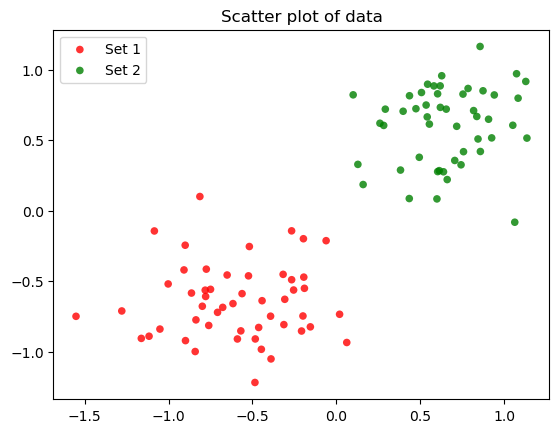

In [213]:
# Generate 2-dimensional data for the training now
K = 150
trainK = 100
testK = K-trainK

y = np.ones(K)
X = np.ones((2,K))
stdData = 0.3
scaleFact = 0.6
X[:,0:K//2] = (scaleFact*np.array([-1,-1])).reshape(2,1)+stdData*np.random.randn(2,K//2)
X[:,K//2:] = (scaleFact*np.array([1,1])).reshape(2,1)+stdData*np.random.randn(2,K//2)
y[K//2:] = 0 # 150 The half of the data is replaced to 0

# Shuffle the data randomly and divide into training and test sets
shuffleIdx = np.random.permutation(K)# randamly shuffle the index of K values between 0 to 149
X = X[:,shuffleIdx]
y = y[shuffleIdx]

# Training set for training the classifer
XTrain = X[:,0:trainK] # messy data set
yTrain = y[0:trainK]

# Test set (used for evaluating how well the trained classifier performs on previously unseen data)
# i.e this set is treated as the previously unseen data
XTest = X[:,trainK:]
yTest = y[trainK:]

# Check if simulated data is alright
grp1 = XTrain[:,np.where(yTrain==1)]
grp2 = XTrain[:,np.where(yTrain==0)]

# Create plot
fig = plt.figure(); plt.clf()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(grp1[0,:], grp1[1,:], alpha=0.8, c="red", edgecolors='none', s=30, label="Set 1")
ax.scatter(grp2[0,:], grp2[1,:], alpha=0.8, c="green", edgecolors='none', s=30, label="Set 2")

ax.set_title('Scatter plot of data')
plt.legend(loc=2)
plt.show()


Iteration 1. Log-likelihood: -17.577
Iteration 2. Log-likelihood: -7.494
Iteration 3. Log-likelihood: -3.441
Iteration 4. Log-likelihood: -1.641
yTrain[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1.]
TP(%): 95.83, FP(%): 0.00, FN(%): 4.17, TN(%): 100.00
confusion_matrix [[26.  1.]
 [ 0. 23.]]


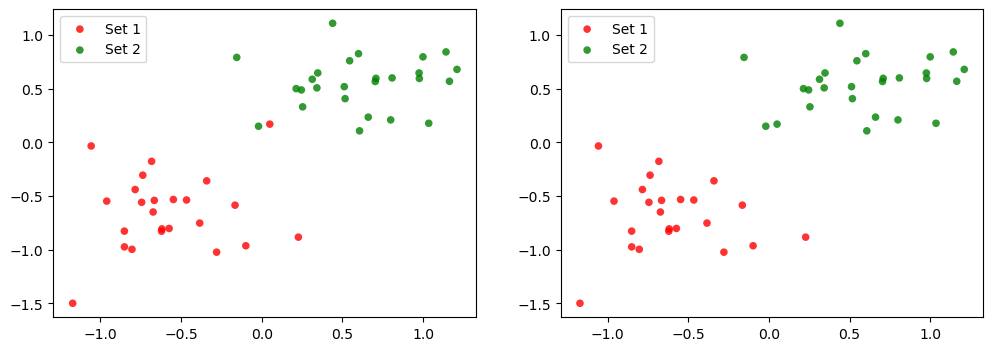

In [214]:
# Include your code here on training and testing the classifiers.
# Don't forget to ensure that the feature vector is augmented during training and testing
# Giving the train data set
thetaVec = LogisticRegressionNewton(XTrain,yTrain,augmentFeatures=True,dbgFlag=True)
print(f"yTrain{yTrain}")
# print(f"thetaVec{thetaVec}")#[ 0.11975687 -4.83061707 -4.69767624]

# Predict the label for the test data.
yHat = PredictLabel(XTest,thetaVec) # predict labels

# Include the confusion matrix and performance metrics in your summary of the classifier performance.
confusion_matrix = GetConfusionMatrix(yTrue = yTest, yHat = yHat)
ComputeMetrics(confusion_matrix)
print(f"confusion_matrix {confusion_matrix}" )

# Check if simulated data is alright
grp1_test= XTest[:,np.where(yTest==1)]
grp2_test = XTest[:,np.where(yTest==0)]
grp1_hat = XTest[:,np.where(yHat==1)]
grp2_hat = XTest[:,np.where(yHat==0)]

# TIP: you should obtain TN and TP rates > 95% for this synthetic case...

# Report your results
figure = plt.figure(figsize=(12,4))
a = figure.add_subplot(121)
plt.scatter(grp1_test[0,:], grp1_test[1,:], alpha=0.8, c="red", edgecolors='none', s=30, label="Set 1")
plt.scatter(grp2_test[0,:], grp2_test[1,:], alpha=0.8, c="green", edgecolors='none', s=30, label="Set 2")
ax.set_title('Scatter plot of data(test)')
plt.legend(loc=2)

a = figure.add_subplot(122)
plt.scatter(grp1_hat[0,:], grp1_hat[1,:], alpha=0.8, c="red", edgecolors='none', s=30, label="Set 1")
plt.scatter(grp2_hat[0,:], grp2_hat[1,:], alpha=0.8, c="green", edgecolors='none', s=30, label="Set 2")
ax.set_title('Scatter plot of data(prediction)')
plt.legend(loc=2)
plt.show()

<div class="alert alert-success">
<span style="color:black">
  
$$\boldsymbol{\mathcal{C}} =
\begin{bmatrix}
28 & 0 \\
1 & 21 
\end{bmatrix}$$
    
 
Performance metrics:
    $$\fcn{TP}(\%) = 100$$
    $$\fcn{FP}(\%) = 3.45$$
    $$\fcn{FN}(\%) = 0.00$$
    $$\fcn{TN}(\%) = 96.55$$

As you can see the result above, one false positive occurs in this classifier, which means that one data point is incorrectly predicted, which tells us that the classifier is trained well with 100 training-data samples.
</span>
</div>

### Real-world data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 
The dataset has been slightly modified from the original and is split, for your convenience, into the `train` and `test` sets.

#### Read data from the training file and train the classifier.

<div class="alert alert-info"> 

* Use the code below to read the data. 
    
</div>

In [215]:
# Import data from the diabetes test file.
# This is the training data. First fit the classifier parameters on this training data.
XTrain = []; yTrain = []
fr = open('./diabetesTrain.csv')

for line in fr.readlines():
    lineArr = line.strip().split(',')
    
    # Get the dimension of each line. This contains the features (diagnostic measurements)
    # for each subject and a label (diabetic or not). The label is the last element of each row
    nElements = len(lineArr)  

    yTrain.append(float(lineArr[-1]))  # The outcome is the last element.
    
    # Now append the data to the M-dimensional feature matrix.
    featVec = []
    for i in lineArr[0:-1]:
        featVec.append(float(i))
    XTrain.append(featVec)

XTrain = np.array(XTrain).T  # Dimension should be N x M (#features x #data-points)
yTrain = np.array(yTrain)


<div class="alert alert-info">

* Use the _Newton's_ approach to train the classifier. 
* Use an intercept (offset/bias in the exponent term) in training the classifier (i.e., augment the training data).

</div>

In [216]:
# Train the classifier on the training data.
# Don't forget to augment the data!
theta = LogisticRegressionNewton(XTrain,yTrain ,augmentFeatures=True,dbgFlag=True)

Iteration 1. Log-likelihood: -299.160
Iteration 2. Log-likelihood: -289.338
Iteration 3. Log-likelihood: -288.924
Iteration 4. Log-likelihood: -288.922
Iteration 5. Log-likelihood: -288.922
Iteration 6. Log-likelihood: -288.922
Iteration 7. Log-likelihood: -288.922
Iteration 8. Log-likelihood: -288.922
Iteration 9. Log-likelihood: -288.922
Iteration 10. Log-likelihood: -288.922
Iteration 11. Log-likelihood: -288.922
Iteration 12. Log-likelihood: -288.922
Iteration 13. Log-likelihood: -288.922
Iteration 14. Log-likelihood: -288.922
Iteration 15. Log-likelihood: -288.922
Iteration 16. Log-likelihood: -288.922
Iteration 17. Log-likelihood: -288.922
Iteration 18. Log-likelihood: -288.922
Iteration 19. Log-likelihood: -288.922
Iteration 20. Log-likelihood: -288.922
Iteration 21. Log-likelihood: -288.922
Iteration 22. Log-likelihood: -288.922
Iteration 23. Log-likelihood: -288.922
Iteration 24. Log-likelihood: -288.922
Iteration 25. Log-likelihood: -288.922
Iteration 26. Log-likelihood: -288

#### Naïve classifier

The most rudimentary classifier is one that simply makes a _majority_ decision. In other words, if the majority of the population in the training set belong to a particular class, each element of the test set is set to that _majority_ class. 

<div class="alert alert-info">

Let us calculate the naïve decision error rate. Use following code snippet for this:

</div>

In [217]:
# This depends on the prevalance of the condition in the population
Ph1 = np.sum(yTrain)/np.size(yTrain) #Ph1: a priori probability that a person has the condition
# Error rate = 1-np.maximum(Ph1,1-Ph1)
naiveErr = (1-np.maximum(Ph1,1-Ph1))*100 # Expressing in percentage
print("Naive error: %2.2f%%."%naiveErr)

Naive error: 34.85%.


Of course, in order for our classifier to be useful, its error rate should be better than this. 

<div class = "alert alert-info" >

* Compute the confusion matrix of your trained classifier on _`XTrain`_. This is the error on the training data. This will show that real life data can usually never be perfectly classified and that some error is inherent.
* Compute the percentage of _total false decisions_ (**Tip:** this should be in the range of 20\% - 25\% or lower)
    
</div>

In [218]:
# Error rate of the trained classifier (% of wrong decisions) on the training data
# This will show that real life data can usually never be perfectly classified and that some error is inherent.
yHat = PredictLabel(XTrain,theta)
confMatrix = GetConfusionMatrix(yTrue=yTrain,yHat=yHat)
errCount = confMatrix[0,1]+confMatrix[1,0]# number of FN + number of FP
errRate =  100*errCount/(np.size(yHat))# Percentage over total number of training data points
print("Error of logistic regressio shapen: %2.2f%%."%errRate)
# XTrain
#(8, 614) XTrain

Error of logistic regressio。shapen: 22.48%.


#### Now test on the test data

<div class="alert alert-info">

* First read the data from the `diabetesTest.csv` file in a similar manner as done for the training data. Use the snippet below for this.
    
</div>

In [219]:
# Import data from the modified diabetes test file.
XTest = []; yTest = []
fr = open('./diabetesTest.csv')
for line in fr.readlines():
    lineArr = line.strip().split(',')
    nElements = len(lineArr)  # Get the dimension of each line.

    yTest.append(float(lineArr[-1]))  # The outcome is the last element.
    
    # Now append the data to the M-dimensional feature matrix.
    featVec = []
    for i in lineArr[0:-1]:
        featVec.append(float(i))
    XTest.append(featVec)
    

XTest = np.array(XTest).T  # Dimension should be M x K (#features x #data-points)
yTest = np.array(yTest)

<div class="alert alert-info">

* Now apply the trained classifier to predict the label of each test datapoint
* Compute the confusion matrix and the performance metrics. List them below. (**Tip:** if all is correct, you should obtain a TP rate of around 61\% and a TN rate of around 86\%)
* Compare the error rate to the error rate of the naïve classifier obtained on the training data. 
    
</div>

In [220]:
# Predicted label using logistic regression classifier trained previously
yHat = PredictLabel(XTest,theta)

# Confusion matrix
confusionMatrix = GetConfusionMatrix(yTrue=yTest,yHat=yHat)#  yTest is the true class label.
print(confusionMatrix)

# Performance metrics (calculating the percentage of TP, FP, FN and TN)
ComputeMetrics(confusionMatrix)

# Error rate of logistic regression classifier
errCount = confusionMatrix [0,1]+confusionMatrix [1,0]
errRate = 100*errCount/(np.size(yHat))
print("Error of logistic regression: %2.2f%%."%errRate)

[[86. 21.]
 [14. 33.]]
TP(%): 61.11, FP(%): 14.00, FN(%): 38.89, TN(%): 86.00
Error of logistic regression: 22.73%.


<div class="alert alert-success">
<span style="color:black">
  
What are your observations/conclusions based on the results?
    
   Compared to the error rate of the naive classifier obtained on the training data(34.85%), the error rate becomes smaller after the dataset is trained. However, 22.73% error occurs in this dataset, which is relatively high. Therefor we need to imporve the performance of the classifier by, for example, increasing the dataset size. However, when it comes to increasing it, you should keep in mind that if the new features are noisy or redundatn, the accuracy would woren. Thus it is important to carefully evaluate and choose new fetures before adding them to the dataset.
</span>
</div>

In [241]:
### just for understaind what is conducting 


def GetConfusionMatrix(yTrue,yHat):
    confMatrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confMatrix[i,j] = np.sum(np.where(yHat == i, 1, 0)*np.where(yTrue == j, 1, 0))
    return confMatrix

# Predicted label using logistic regression classifier trained previously
yHat = PredictLabel(XTest,theta)

# Confusion matrix
confusionMatrix = GetConfusionMatrix(yTrue=yTest,yHat=yHat)
print(confusionMatrix)

# Performance metrics (calculating the percentage of TP, FP, FN and TN)
ComputeMetrics(confusionMatrix)

# Error rate of logistic regression classifier
errCount = confusionMatrix [0,1]+confusionMatrix [1,0]
errRate = 100*errCount/(np.size(yHat))
print("Error of logistic regression: %2.2f%%."%errRate)

a = np.where(yHat == 0, 1, 0)
b = np.where(yTest == 0, 1, 0)
c = a*b

[[86. 21.]
 [14. 33.]]
TP(%): 61.11, FP(%): 14.00, FN(%): 38.89, TN(%): 86.00
Error of logistic regression: 22.73%.


In [237]:
a

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [238]:
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [239]:
c

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])